
# 1.Loading and Preprocessing



In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
# Step 1: Exporting the California Housing dataset to CSV

from sklearn.datasets import fetch_california_housing

# Load the dataset from sklearn
california_housing = fetch_california_housing()

# Convert it to a DataFrame
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data['MedHouseVal'] = california_housing.target

# Save it as a CSV file
data.to_csv('california_housing.csv', index=False)


In [26]:
# Step 2: Loading the dataset using pd.read_csv()

# Load the dataset from the CSV file
df = pd.read_csv('california_housing.csv')

# Display the first few rows of the dataframe
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
# Step 3: Preprocessing
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [29]:
# Assuming 'target' is the column to predict
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

In [31]:

# Feature Scaling (for models sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

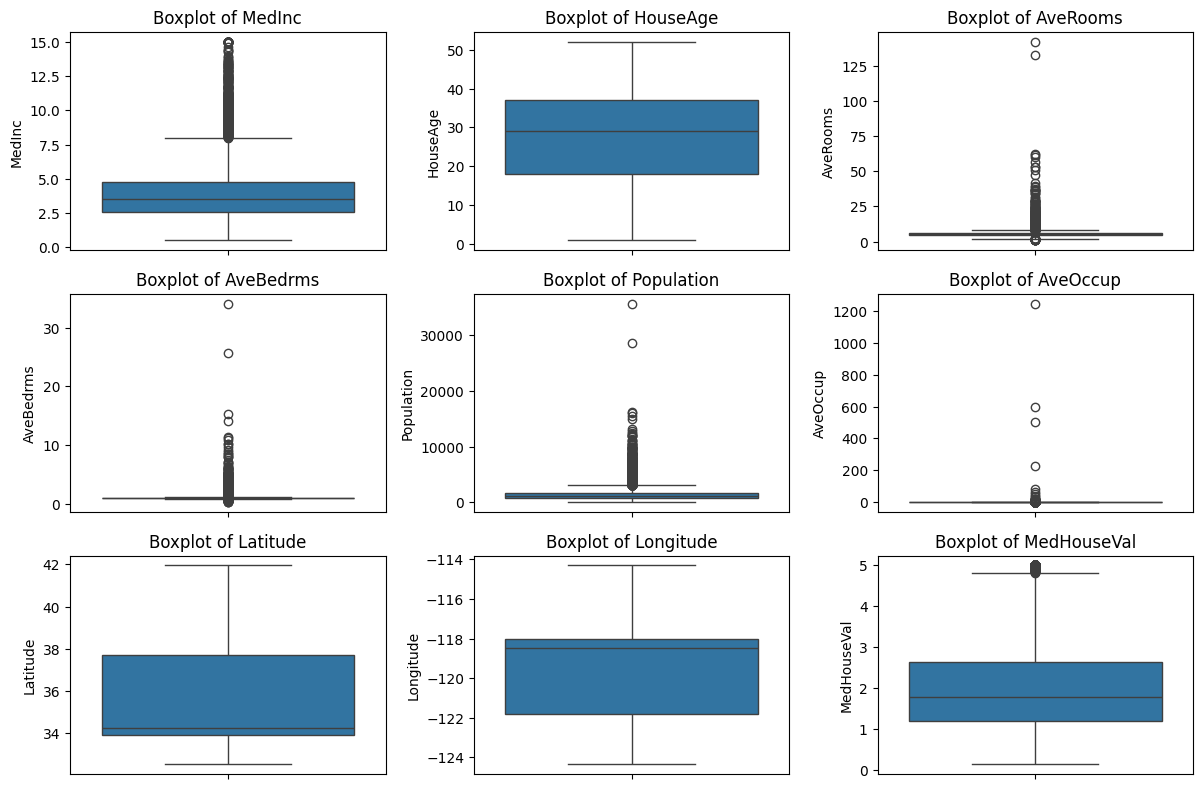

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for each column to detect outliers
plt.figure(figsize=(12, 8))

# List of columns to check
columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']

for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # 3 rows, 3 columns for boxplots
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


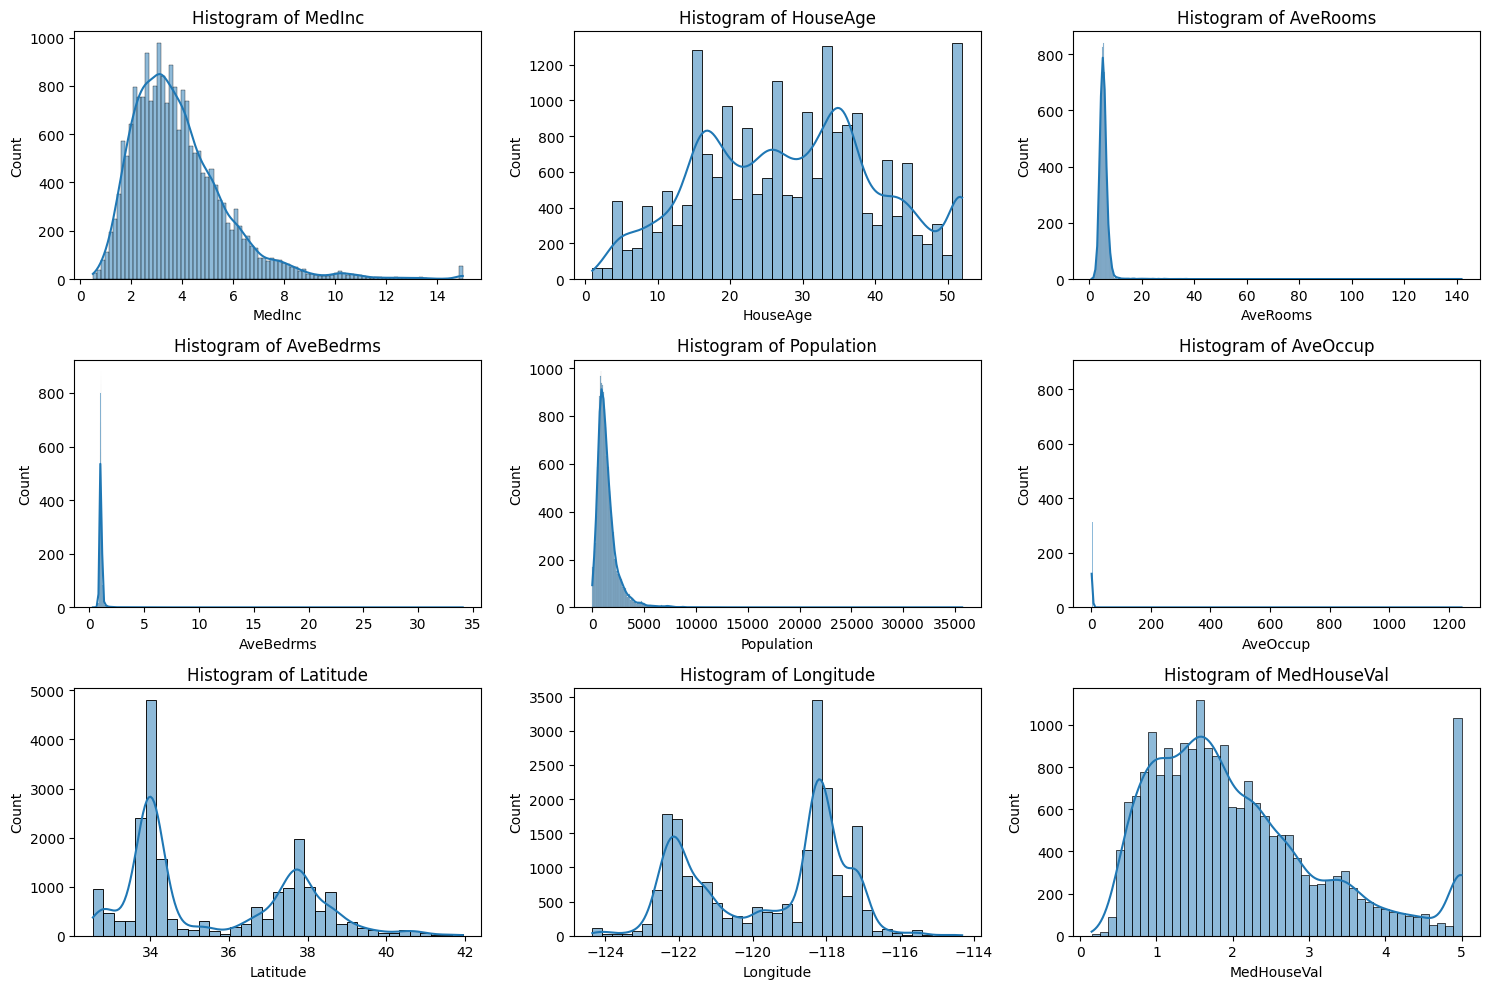

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# List of columns to check normality
columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']

# Plot histogram for each feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


##preprocessing steps you performed and justify why they are necessary for this dataset.


I performed data preprocessing to ensure there were no missing values. Since the dataset contained outliers, I applied Standard Scaling to normalize the feature distributions. Additionally, some features were already normally distributed, making Standard Scaling a suitable choice for maintaining consistency across the dataset.

#Regression Algorithm Implementation

In [43]:
# Split dataset into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [44]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Support Vector Regressor (SVR)": SVR(kernel='rbf', C=1.0)
}

In [45]:
# Train and evaluate models
results = {}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R2 Score": r2}

    print(f"\n{name}:")
    print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2 Score: {r2:.4f}")


Linear Regression:
MAE: 0.5332, RMSE: 0.7456, R2 Score: 0.5758

Decision Tree Regressor:
MAE: 0.5223, RMSE: 0.7242, R2 Score: 0.5997

Random Forest Regressor:
MAE: 0.3276, RMSE: 0.5055, R2 Score: 0.8050

Gradient Boosting Regressor:
MAE: 0.3717, RMSE: 0.5422, R2 Score: 0.7756

Support Vector Regressor (SVR):
MAE: 0.3978, RMSE: 0.5960, R2 Score: 0.7289


**Linear Regression**
    Data has a linear relationship, easy interpretation is needed
    Data is non-linear or has many outliers

**Decision Tree Regressor**
    Data is non-linear, feature interactions are important
    High risk of overfitting

**Random Forest Regressor**
    You need better accuracy and less overfitting
    Dataset is very large (computationally expensive)


**Gradient Boosting Regressor**
    Highly accurate predictions are required,
    dataset is small to medium	Requires fine-tuning, slower than RF


**Support Vector Regressor (SVR)**
    Data has complex, non-linear relationships
    Dataset is large, requires careful tuning

# 3.Model Evaluation and Comparison

📌 **Best-Performing Algorithm:**
 Random Forest Regressor
Justification:
Lowest MAE (0.3276) → This means the model's average prediction error is the smallest.

Lowest RMSE (0.5055) → Indicates it makes fewer large errors compared to other models.

Highest R² Score (0.8050) → Explains 80.5% of the variance in the target variable, meaning it captures patterns in the data effectively.

Why is it the best?
✅ Handles non-linearity well – Unlike Linear Regression, it captures complex relationships.
✅ Reduces overfitting – Since it’s an ensemble method, it generalizes better.
✅ Works well on large datasets – Random Forest leverages multiple decision trees to improve accuracy.

📌 **Worst-Performing Algorithm**:
Linear Regression
Reasoning:
Highest MAE (0.5332) and Highest RMSE (0.7456) → Indicates the model makes larger prediction errors.

Lowest R² Score (0.5758) → Only 57.58% of the variance is explained, meaning it struggles to capture the complexity of the data.

Why is it the worst?
❌ Assumes a linear relationship – If the dataset has non-linear patterns, Linear Regression will not capture them well.
❌ Sensitive to outliers – Since it minimizes squared errors, large deviations have a big impact.
❌ Limited flexibility – Unlike tree-based models, it doesn’t automatically handle feature interactions.

✔ Best Model: Random Forest Regressor – Most accurate and robust.


❌ Worst Model: Linear Regression – Struggles with complex patterns.